In [2]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import KFold
from lightgbm.sklearn import LGBMRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
import time

In [3]:
path='d:/datalab/'
Train_data = pd.read_csv(path+'used_car_train_20200313.csv', sep=' ')
Test_data = pd.read_csv(path+'used_car_testB_20200421.csv', sep=' ')

In [5]:
# 合并方便后面的操作
df = pd.concat([Train_data, Test_data], ignore_index=True)
df

,SaleID,bodyType,brand,creatDate,fuelType,gearbox,kilometer,model,name,notRepairedDamage,...,v_13,v_14,v_2,v_3,v_4,v_5,v_6,v_7,v_8,v_9
0,0,1.0,6,20160404,0.0,0.0,12.5,30.0,736,0.0,...,0.795292,0.914762,0.050257,2.159744,1.143786,0.235676,0.101988,0.129549,0.022816,0.097462
1,1,2.0,1,20160309,0.0,0.0,15.0,40.0,2262,-,...,-1.722674,0.245522,0.137925,1.380657,-1.422165,0.264777,0.121004,0.135731,0.026597,0.020582
2,2,1.0,15,20160402,0.0,0.0,12.5,115.0,14874,0.0,...,-0.832687,-0.229963,1.319524,-0.998467,-0.996911,0.251410,0.114912,0.165147,0.062173,0.027075
3,3,0.0,10,20160312,0.0,1.0,15.0,109.0,71865,0.0,...,-2.438353,-0.478699,-0.050616,0.883600,-2.228079,0.274293,0.110300,0.121964,0.033395,0.000000
4,4,1.0,5,20160313,0.0,0.0,5.0,110.0,111080,0.0,...,2.834518,1.923482,0.572169,-1.571239,2.246088,0.228036,0.073205,0.091880,0.078819,0.121534
5,5,0.0,10,20160319,1.0,0.0,10.0,24.0,137642,0.0,...,-0.286973,0.206573,0.156615,-1.727217,-0.345690,0.260246,0.000518,0.119838,0.090922,0.048769
6,6,0.0,4,20160317,0.0,1.0,15.0,13.0,2402,0.0,...,-1.996117,-0.103180,0.113311,1.644606,-1.270381,0.267998,0.117675,0.142334,0.025446,0.028174
7,7,1.0,14,20160326,0.0,0.0,15.0,26.0,165346,0.0,...,0.236728,0.195567,-0.676693,1.942673,0.524206,0.239506,0.000000,0.122943,0.039839,0.082413
8,8,2.0,1,20160326,1.0,1.0,15.0,19.0,2974,0.0,...,-1.551098,0.069433,0.475333,0.556575,-1.262490,0.263833,0.116583,0.144255,0.039851,0.024388
9,9,5.0,7,20160402,0.0,0.0,15.0,7.0,82021,0.0,...,0.198273,-1.025822,-2.201545,3.096861,0.843852,0.262473,0.068267,0.012176,0.010291,0.098727


In [6]:
df['price']

0          1850.0
1          3600.0
2          6222.0
3          2400.0
4          5200.0
5          8000.0
6          3500.0
7          1000.0
8          2850.0
9           650.0
10         3100.0
11         5450.0
12         1600.0
13         3100.0
14         6900.0
15         3200.0
16        10500.0
17         3700.0
18          790.0
19         1450.0
20          990.0
21         2800.0
22          350.0
23          599.0
24         9250.0
25         3650.0
26         2800.0
27         2399.0
28         4900.0
29         2999.0
           ...   
199970        NaN
199971        NaN
199972        NaN
199973        NaN
199974        NaN
199975        NaN
199976        NaN
199977        NaN
199978        NaN
199979        NaN
199980        NaN
199981        NaN
199982        NaN
199983        NaN
199984        NaN
199985        NaN
199986        NaN
199987        NaN
199988        NaN
199989        NaN
199990        NaN
199991        NaN
199992        NaN
199993        NaN
199994    

In [7]:
#查看数据信息
df.info()
#查看缺失值
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 31 columns):
SaleID               200000 non-null int64
bodyType             193990 non-null float64
brand                200000 non-null int64
creatDate            200000 non-null int64
fuelType             188396 non-null float64
gearbox              192051 non-null float64
kilometer            200000 non-null float64
model                199999 non-null float64
name                 200000 non-null int64
notRepairedDamage    200000 non-null object
offerType            200000 non-null int64
power                200000 non-null int64
price                150000 non-null float64
regDate              200000 non-null int64
regionCode           200000 non-null int64
seller               200000 non-null int64
v_0                  200000 non-null float64
v_1                  200000 non-null float64
v_10                 200000 non-null float64
v_11                 200000 non-null float64
v_12    

SaleID                   0
bodyType              6010
brand                    0
creatDate                0
fuelType             11604
gearbox               7949
kilometer                0
model                    1
name                     0
notRepairedDamage        0
offerType                0
power                    0
price                50000
regDate                  0
regionCode               0
seller                   0
v_0                      0
v_1                      0
v_10                     0
v_11                     0
v_12                     0
v_13                     0
v_14                     0
v_2                      0
v_3                      0
v_4                      0
v_5                      0
v_6                      0
v_7                      0
v_8                      0
v_9                      0
dtype: int64

In [8]:
#类别特征nunique分布
cat_fea = ['name', 'regDate', 'model', 'brand', 'bodyType', 'fuelType',
           'gearbox', 'kilometer', 'notRepairedDamage', 'regionCode',
           'seller', 'offerType', 'creatDate']
for fea in cat_fea:
    print(fea + "的特征分布如下：")
    print("{}特征有个{}不同的值".format(fea,df[fea].nunique()))
    print(df[fea].value_counts())

name的特征分布如下：
name特征有个128660不同的值
387       376
55        373
708       367
1541      349
203       311
713       292
53        289
290       265
911       254
1186      244
1180      229
2044      226
631       224
1513      206
893       200
473       195
2765      192
306       180
1139      178
2866      175
444       166
1108      164
422       162
533       158
1479      154
964       153
2402      148
4635      147
725       139
984       138
         ... 
108134      1
99938       1
136720      1
106081      1
134675      1
144916      1
140822      1
155161      1
161308      1
157214      1
159263      1
38464       1
34370       1
46660       1
42566       1
44615       1
54856       1
52811       1
63052       1
65101       1
58958       1
61007       1
5712        1
7761        1
1618        1
13908       1
11863       1
30300       1
28255       1
151818      1
Name: name, Length: 128660, dtype: int64
regDate的特征分布如下：
regDate特征有个3898不同的值
20000008    235
20000011    213
20000

<Figure size 432x288 with 0 Axes>

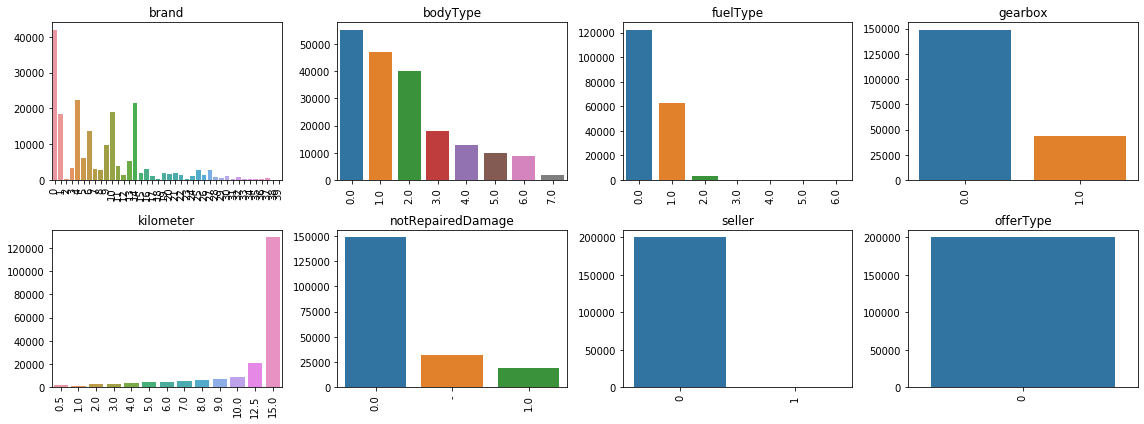

In [9]:
#类别特征取值较少的，画出直方图,
#'notRepairedDamage'存在无效字符，'seller,offerType'数值分布极不平衡
plt.figure()
plt.figure(figsize=(16, 6))
i = 1
for fea in cat_fea:
    if df[fea].nunique()<50:
        plt.subplot(2, 4, i)
        i += 1
        v = df[fea].value_counts()
        fig = sns.barplot(x=v.index, y=v.values)
        for item in fig.get_xticklabels():
            item.set_rotation(90)
        plt.title(fea)
plt.tight_layout()
plt.show()

<Figure size 432x288 with 0 Axes>

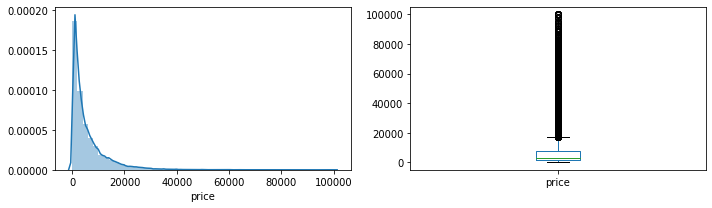

In [10]:
#'price'为长尾分布，需要做数据转换
plt.figure()
plt.figure(figsize=(10, 3))
plt.subplot(1, 2,1)
sns.distplot(Train_data['price'])
plt.subplot(1,2,2)
Train_data['price'].plot.box()
plt.tight_layout()

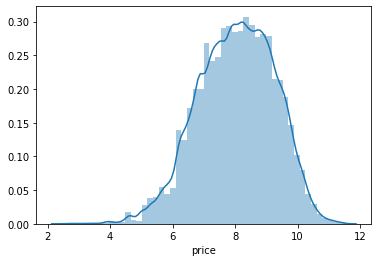

In [11]:
#'price'转化后的分布
plt.figure()
sns.distplot(np.log1p(Train_data['price']))

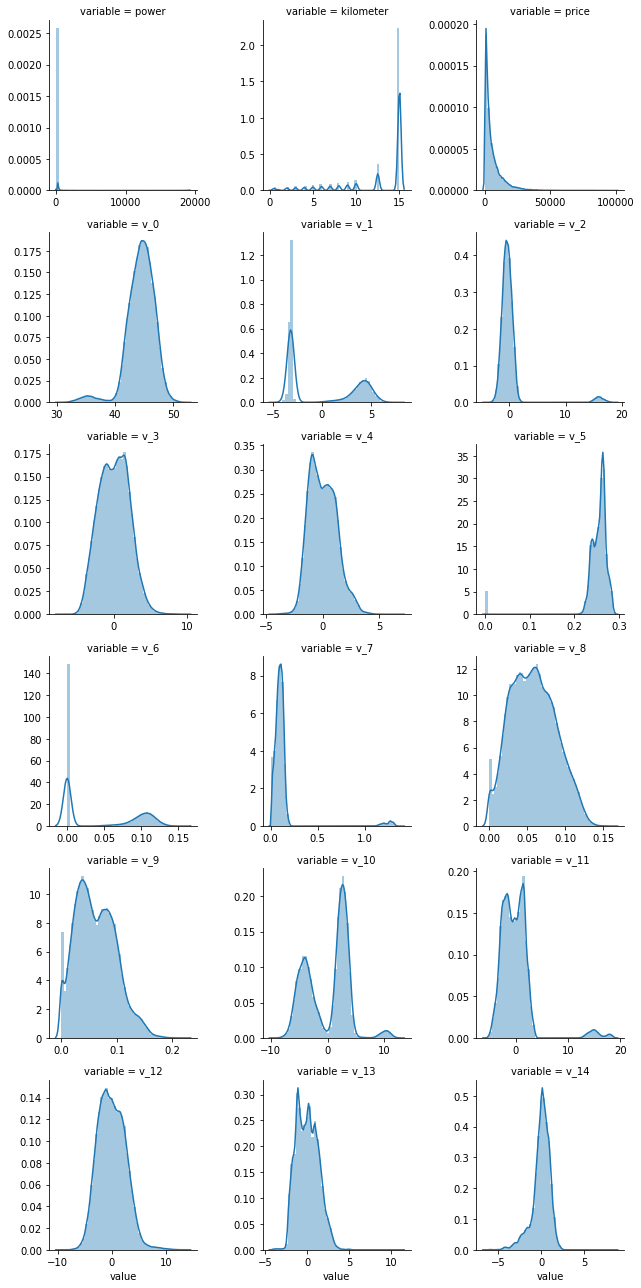

In [12]:
#数值特征分布，'power'的分布比较奇怪，后面做处理
num_fea = ['power', 'kilometer','price','v_0', 'v_1', 'v_2', 'v_3',
       'v_4', 'v_5', 'v_6', 'v_7', 'v_8', 'v_9', 'v_10', 'v_11', 'v_12',
       'v_13', 'v_14']

f = pd.melt(Train_data, value_vars=num_fea)
g = sns.FacetGrid(f, col="variable",  col_wrap=3, sharex=False, sharey=False)
g = g.map(sns.distplot, "value")

<Figure size 432x288 with 0 Axes>

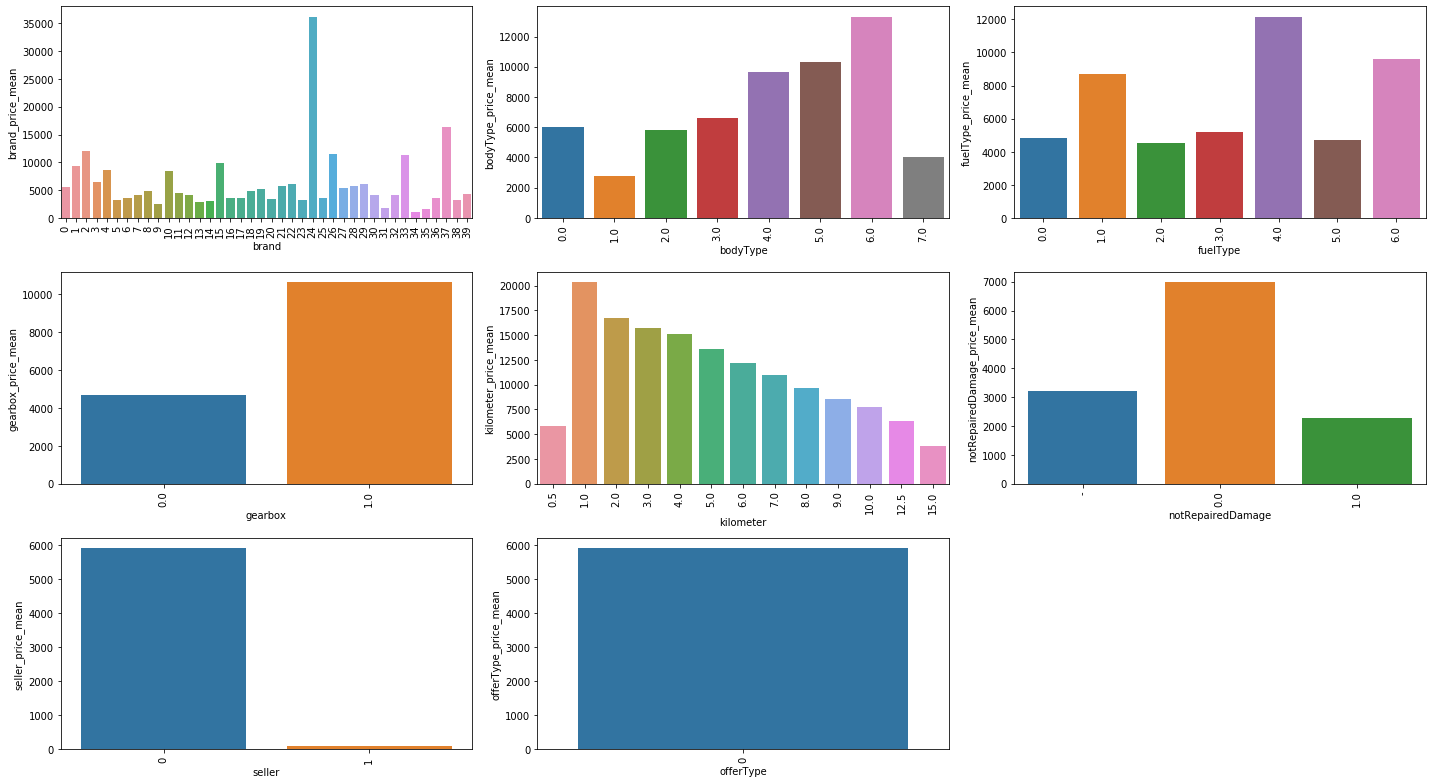

In [13]:
#选取类别特征取值较少的，观察它们与价格的均值分布，其中'kilometer'对价格的影响很明显
plt.figure()
plt.figure(figsize=(20, 18))
i = 1
for f in cat_fea:
    if df[f].nunique() <= 50:
        plt.subplot(5, 3, i)
        i += 1
        v = df[~df['price'].isnull()].groupby(f,as_index=False)['price'].agg({f + '_price_mean': 'mean'}).reset_index()
        fig = sns.barplot(x=f, y=f + '_price_mean', data=v)
        for item in fig.get_xticklabels():
            item.set_rotation(90)
plt.tight_layout()
plt.show()

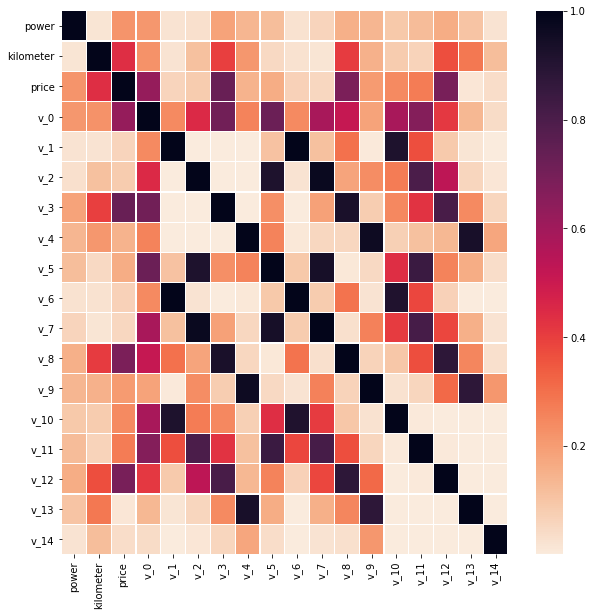

In [14]:
#匿名特征v_0,v_3,v_8,v_12与'price'相关性很高
corr1 = abs(df[df['price'].notnull()][num_fea].corr())
plt.figure(figsize=(10, 10))
sns.heatmap(corr1, linewidths=0.1, cmap=sns.cm.rocket_r)

In [15]:
#'name'有部分重复值，做一个简单统计
df['name_count'] = df.groupby(['name'])['SaleID'].transform('count')
del df['name']
del df['offerType']
del df['seller']

#对'price'做对数变换
df['price'] = np.log1p(df['price'])

In [17]:
df['name_count'] 

0         108
1          29
2           3
3           2
4           1
5           1
6         148
7           1
8          43
9           2
10         11
11          1
12          1
13          6
14         91
15          3
16         16
17          1
18          1
19         16
20          1
21          6
22          1
23         13
24          2
25          6
26        107
27         26
28          1
29          8
         ... 
199970      1
199971      1
199972      1
199973      1
199974      1
199975      1
199976     70
199977      1
199978      7
199979      1
199980      7
199981      1
199982      1
199983     59
199984      1
199985      1
199986     36
199987      1
199988      1
199989      1
199990      1
199991      1
199992      7
199993     31
199994      5
199995      1
199996      1
199997      1
199998      1
199999      1
Name: name_count, Length: 200000, dtype: int64

In [18]:
#用众数填充缺失值
df['fuelType'] = df['fuelType'].fillna(0)
df['gearbox'] = df['gearbox'].fillna(0)
df['bodyType'] = df['bodyType'].fillna(0)
df['model'] = df['model'].fillna(0)

In [19]:
#处理异常值
df['power'] = df['power'].map(lambda x: 600 if x>600 else x)#赛题限定power<=600
df['notRepairedDamage'] = df['notRepairedDamage'].astype('str').apply(lambda x: x if x != '-' else None).astype('float32')

In [20]:
# 对可分类的连续特征进行分桶，kilometer是已经分桶了
bin = [i*10 for i in range(31)]
df['power_bin'] = pd.cut(df['power'], bin, labels=False)

bin = [i*10 for i in range(24)]
df['model_bin'] = pd.cut(df['model'], bin, labels=False)

In [21]:
#时间提取出年，月，日和使用时间
from datetime import datetime
def date_process(x):
    year = int(str(x)[:4])
    month = int(str(x)[4:6])
    day = int(str(x)[6:8])

    if month < 1:
        month = 1

    date = datetime(year, month, day)
    return date

df['regDate'] = df['regDate'].apply(date_process)
df['creatDate'] = df['creatDate'].apply(date_process)
df['regDate_year'] = df['regDate'].dt.year
df['regDate_month'] = df['regDate'].dt.month
df['regDate_day'] = df['regDate'].dt.day
df['creatDate_year'] = df['creatDate'].dt.year
df['creatDate_month'] = df['creatDate'].dt.month
df['creatDate_day'] = df['creatDate'].dt.day
df['car_age_day'] = (df['creatDate'] - df['regDate']).dt.days#二手车使用天数
df['car_age_year'] = round(df['car_age_day'] / 365, 1)#二手车使用年数

In [22]:
#类别特征对价格的统计最大，最小，平均值等等
cat_cols = ['brand','model','kilometer','fuelType','bodyType']
for col in cat_cols:
    t = Train_data.groupby(col,as_index=False)['price'].agg(
        {col+'_count':'count',col+'_price_max':'max',col+'_price_median':'median',
         col+'_price_min':'min',col+'_price_sum':'sum',col+'_price_std':'std',col+'_price_mean':'mean'})
    df = pd.merge(df,t,on=col,how='left')

#行驶路程与功率统计
kk = ['kilometer','power']
t1 = Train_data.groupby(kk[0],as_index=False)[kk[1]].agg(
        {kk[0]+'_'+kk[1]+'_count':'count',kk[0]+'_'+kk[1]+'_max':'max',kk[0]+'_'+kk[1]+'_median':'median',
         kk[0]+'_'+kk[1]+'_min':'min',kk[0]+'_'+kk[1]+'_sum':'sum',kk[0]+'_'+kk[1]+'_std':'std',kk[0]+'_'+kk[1]+'_mean':'mean'})
df = pd.merge(df,t1,on=kk[0],how='left')

In [23]:
num_cols = [0,3,8,12]
for i in num_cols:
    for j in num_cols:
        df['new'+str(i)+'*'+str(j)]=df['v_'+str(i)]*df['v_'+str(j)]
        
for i in num_cols:
    for j in num_cols:
        df['new'+str(i)+'+'+str(j)]=df['v_'+str(i)]+df['v_'+str(j)]

for i in num_cols:
    for j in num_cols:
        df['new'+str(i)+'-'+str(j)]=df['v_'+str(i)]-df['v_'+str(j)]

for i in range(15):
    df['new'+str(i)+'*year']=df['v_'+str(i)] * df['car_age_year']

In [24]:
#划分训练数据和测试数据
df1 = df.copy()
test = df1[df1['price'].isnull()]
X_train = df1[df1['price'].notnull()].drop(['price','regDate','creatDate','SaleID','regionCode'],axis=1)
Y_train = df1[df1['price'].notnull()]['price']
X_test = df1[df1['price'].isnull()].drop(['price','regDate','creatDate','SaleID','regionCode'],axis=1)

In [25]:
cols = list(X_train)
oof = np.zeros(X_train.shape[0])
sub = test[['SaleID']].copy()
sub['price'] = 0
feat_df = pd.DataFrame({'feat': cols, 'imp': 0})
skf = KFold(n_splits=5, shuffle=True, random_state=2020)

clf = LGBMRegressor(
    n_estimators=10000,
    learning_rate=0.02,
    boosting_type= 'gbdt',
    objective = 'regression_l1',
    max_depth = -1,
    num_leaves=31,
    min_child_samples = 20,
    feature_fraction = 0.8,
    bagging_freq = 1,
    bagging_fraction = 0.8,
    lambda_l2 = 2,
    random_state=2020,
    metric='mae'
)

mae = 0
for i, (trn_idx, val_idx) in enumerate(skf.split(X_train, Y_train)):
    print('--------------------- {} fold ---------------------'.format(i+1))
    trn_x, trn_y = X_train.iloc[trn_idx].reset_index(drop=True), Y_train[trn_idx]
    val_x, val_y = X_train.iloc[val_idx].reset_index(drop=True), Y_train[val_idx]
    clf.fit(
        trn_x, trn_y,
        eval_set=[(val_x, val_y)],
        eval_metric='mae',
        early_stopping_rounds=300,
        verbose=300
    )
    
    sub['price'] += np.expm1(clf.predict(X_test)) / skf.n_splits
    oof[val_idx] = clf.predict(val_x)
    print('val mae:', mean_absolute_error(np.expm1(val_y), np.expm1(oof[val_idx])))
    mae += mean_absolute_error(np.expm1(val_y), np.expm1(oof[val_idx]))/skf.n_splits

print('cv mae:', mae)
#生成提交文件
sub.to_csv('sumbit.csv',index=False)

--------------------- 1 fold ---------------------
Training until validation scores don't improve for 300 rounds
[300]	valid_0's l1: 0.147832
[600]	valid_0's l1: 0.131149
[900]	valid_0's l1: 0.125027
[1200]	valid_0's l1: 0.121507
[1500]	valid_0's l1: 0.119398
[1800]	valid_0's l1: 0.117839
[2100]	valid_0's l1: 0.116544
[2400]	valid_0's l1: 0.115587
[2700]	valid_0's l1: 0.114823
[3000]	valid_0's l1: 0.114121
[3300]	valid_0's l1: 0.113524
[3600]	valid_0's l1: 0.113075
[3900]	valid_0's l1: 0.112679
[4200]	valid_0's l1: 0.112323
[4500]	valid_0's l1: 0.112011
[4800]	valid_0's l1: 0.111738
[5100]	valid_0's l1: 0.111474
[5400]	valid_0's l1: 0.111254
[5700]	valid_0's l1: 0.111045
[6000]	valid_0's l1: 0.110837
[6300]	valid_0's l1: 0.110632
[6600]	valid_0's l1: 0.110468
[6900]	valid_0's l1: 0.110305
[7200]	valid_0's l1: 0.110167
[7500]	valid_0's l1: 0.110038
[7800]	valid_0's l1: 0.109909
[8100]	valid_0's l1: 0.109795
[8400]	valid_0's l1: 0.109685
[8700]	valid_0's l1: 0.109592
[9000]	valid_0's l1: